## Trabajo práctico N1 - Ciencias de datos
Integrantes:
- Albino, Sebastián
- Pacheco Pilan, Federico
- Rodriguez, Alejandro

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_DIRECTORES = "Base Aprender directores 6 primaria 2022 – Muestral.csv"
CSV_ESTUDIANTES = "Base Aprender estudiantes 6 primaria 2022 – Muestral L y M.csv"

VALOR_BLANCO_INT = -9
VALOR_BLANCO_STR = "-9"

VALOR_MULTIMARCA_INT = -6
VALOR_MULTIMARCA_STR = "-6"

VALOR_NODISP_INT = -8
VALOR_NODISP_STR = "-8"

df_directores = pd.read_csv("dataset/" + CSV_DIRECTORES, sep=";")
df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")

C:\Users\rodri\AppData\Local\Temp\ipykernel_4756\3970770803.py:17: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")


In [13]:
df_directores.head()

,ID1,c_jurisdiccion,anio,sector,ambito,dp01,dp02d,dp02u,Edad,dp03a,...,dp44b,dp44c,dp44d,dp44e,dp45a,dp45b,dp45c,dp45d,ponder,region
0,840066020084006,42,6,1,2,2,5,2,52,0,...,0,0,1,0,1,-9,-9,-9,"1,25",SUR
1,135720020280781,26,6,1,1,1,4,1,41,0,...,-9,-9,-9,-9,1,1,1,1,"1,5073273",SUR
2,259600127602225,58,6,1,2,2,5,0,50,0,...,0,0,0,1,-9,-9,2,-9,"5,4848485",SUR
3,957008580009570,26,6,1,1,2,5,8,58,0,...,0,0,0,1,1,-9,1,1,"1,5073273",SUR
4,221001326000221,78,6,1,1,2,4,6,46,0,...,1,1,1,0,2,2,3,2,"1,3846154",SUR


In [14]:
df_estudiantes.head()

,jurisdiccion,ID1,seccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,lpuntaje,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp
0,2,396970010637139,2,22,2,2,,,,,...,"497,61646","395,31659",,,,,,,,
1,2,396970010637139,2,18,2,2,,,,,...,"440,10049","414,74878",,,,,,,,
2,2,396970010637139,1,18,2,2,,,,,...,"608,22382","549,40967",,,,,,,,
3,2,971700824929717,2,10,1,2,,,,,...,"582,31982","526,39301",,,,,,,,
4,2,971700824929717,1,23,1,2,,,,,...,"381,68524","418,19516",,,,,,,,


#### 1. Proporción muestras con y sin acceso a internet.

In [3]:
# Filtro para string vacio
filtro_vacio = df_estudiantes["ap12d"] != " "
# Eliminamos registros vacios (" ")
estudiantes_internet = df_estudiantes["ap12d"]
estudiantes_internet = estudiantes_internet[filtro_vacio]

# Pasamos a int los valores de la columna
estudiantes_internet = estudiantes_internet.astype(int)

# Filtro para valores en Blanco, Multimarca o No disponoible
filtro_blanco_int = estudiantes_internet != VALOR_BLANCO_INT
filtro_multimarca_int = estudiantes_internet != VALOR_MULTIMARCA_INT
filtro_nodisp_int = estudiantes_internet != VALOR_NODISP_INT


# Eliminamos los registros con valores en ‘Blanco’, ‘Multimarca’ o 'No disponible'.
estudiantes_internet = estudiantes_internet[filtro_blanco_int & # filtro_blanco_str & 
                                            filtro_multimarca_int & # filtro_multimarca_str & 
                                            filtro_nodisp_int # & filtro_nodisp_str & 
                                            ]

# estudiantes_internet.unique()
estudiantes_internet.value_counts()

ap12d
1    108171
2      9731
Name: count, dtype: int64

C:\Users\rodri\AppData\Local\Temp\ipykernel_4756\706831771.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


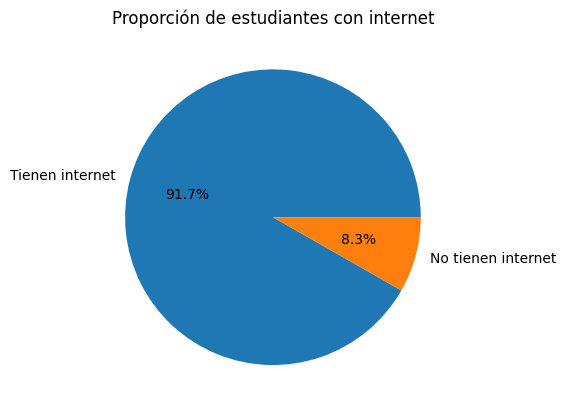

In [7]:
# Graficar proporcion de los que tienen internet y los que no
fig, ax = plt.subplots()

labels = ["Tienen internet", "No tienen internet"]
ax.pie(estudiantes_internet.value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes con internet")

fig.show()